# 1. Import Libraries

In [1]:
#install all needed libraries 
#!pip install -r requirements.txt

#import all libraries
import pandas as pd
import numpy as np 

#Statistics Module 
from pylab import savefig

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

# 2. Load Dataset

In [2]:
#load data from csv
data = pd.read_csv('datasets/house_price.csv')

In [3]:
#Show top 5 rows by default
data.head()

,TotalSqFeet,TotBathroom,OverallQual,GarageCars,Age,SalePrice
0,2566,3.5,7,2,5,208500
1,2524,2.5,6,2,31,181500
2,2706,3.5,7,2,6,223500
3,2473,2.0,7,3,36,140000
4,3343,3.5,8,3,8,250000


In [7]:
#print the dimension of data (row,baris)
data.shape

(1460, 6)

In [5]:
#print information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
TotalSqFeet    1460 non-null int64
TotBathroom    1460 non-null float64
OverallQual    1460 non-null int64
GarageCars     1460 non-null int64
Age            1460 non-null int64
SalePrice      1460 non-null int64
dtypes: float64(1), int64(5)
memory usage: 68.5 KB


In [6]:
#column names (features)
list(data.columns)

['TotalSqFeet', 'TotBathroom', 'OverallQual', 'GarageCars', 'Age', 'SalePrice']

# 3. Descriptive analysis

In [8]:
#print descriptive data
data.describe()

,TotalSqFeet,TotBathroom,OverallQual,GarageCars,Age,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2572.893151,2.210616,6.099315,1.767123,22.950000,180921.195890
std,823.598492,0.785399,1.382997,0.747315,20.640653,79442.502883
min,334.000000,1.000000,1.000000,0.000000,-1.000000,34900.000000
25%,2014.000000,2.000000,5.000000,1.000000,4.000000,129975.000000
50%,2479.000000,2.000000,6.000000,2.000000,14.000000,163000.000000
75%,3008.500000,2.500000,7.000000,2.000000,41.000000,214000.000000
max,11752.000000,6.000000,10.000000,4.000000,60.000000,755000.000000


# 4. Numerical and Categorical Feature

In [9]:
#separate numerical and categorical feature

#numerical
numerical = ['TotalSqFeet', 'TotBathroom', 'OverallQual', 'GarageCars', 'Age']

#categorical
#categorical = ['']

# 5. Missing values

In [12]:
#count how many missing values per field
count_missing = data[numerical].isnull().sum().sort_values(ascending = False)
count_missing.head()

Age            0
GarageCars     0
OverallQual    0
TotBathroom    0
TotalSqFeet    0
dtype: int64

In [13]:
#count how much the percentage of missing value for each field
percentage = round(data[numerical].isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage.head()

Age            0.0
GarageCars     0.0
OverallQual    0.0
TotBathroom    0.0
TotalSqFeet    0.0
dtype: float64

## Exercise

In [ ]:
#1. Merge two dataframes (count_missing and percentage) together to one dataframe
#please put your code here




# 6. Univariate Analysis

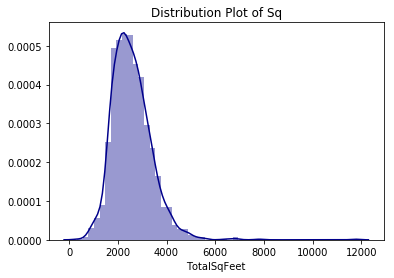

In [22]:
#distribution plot
fig = sns.distplot(data['TotalSqFeet'], kde = True, color = 'darkblue', label = 'TotalSqFeet').set_title('Distribution Plot of Sq')

Text(0.5,1,'Boxplot - TotalSqFeet')

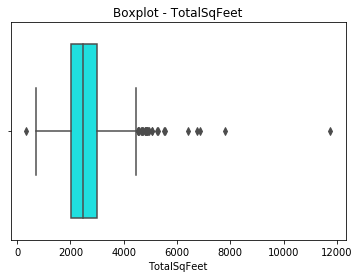

In [17]:
#box plot
sns.boxplot(data = data, x = 'TotalSqFeet', color = 'cyan', orient = "h").set_title('Boxplot - TotalSqFeet')

## Exercise

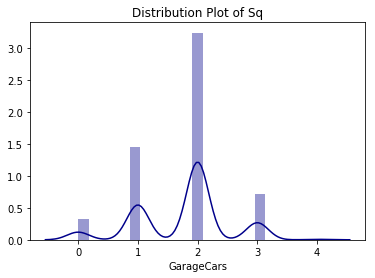

In [23]:
# Create distribution plot for GarageCars
#please put your code here
#distribution plot
fig = sns.distplot(data['GarageCars'], kde = True, color = 'darkblue', label = 'TotalSqFeet').set_title('Distribution Plot of Sq')




Text(0.5,1,'Boxplot - TotBathroom')

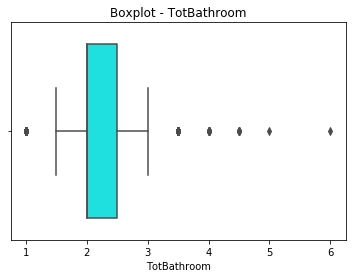

In [27]:
# Create boxplot for TotBathroom
#please put your code here
#box plot
sns.boxplot(data = data, x = 'TotBathroom', color = 'cyan', orient = "h").set_title('Boxplot - TotBathroom')


## Univariate Analysis - one click to get all features

In [30]:
#create funtion to obtain the detail of each feature
def univariate_analysis(data, features):

    #looping through all feature
    for index, feature in enumerate(features):
        
        #create space for two graphs
        fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
        
        #Distribution plot
        #set title
        ax[0].set_title("%d. Distribution Plot - %s" % (index+1, feature), fontsize = 16)
        #create distribution plot
        fig = sns.distplot(data[feature], kde = True, color = 'darkblue', label = feature, ax = ax[0])

        #Boxplot
        #set title
        ax[1].set_title("%d. Box Plot - %s" % (index+1, feature),fontsize = 16)
        #create boxplot
        fig = sns.boxplot(data = data, x = feature, color = 'cyan',orient = "h", ax = ax[1])

        #store distribution plot and boxplot
        plt.savefig('exploration\\%d. Univariate analysis of %s.png' % (index+1, feature))

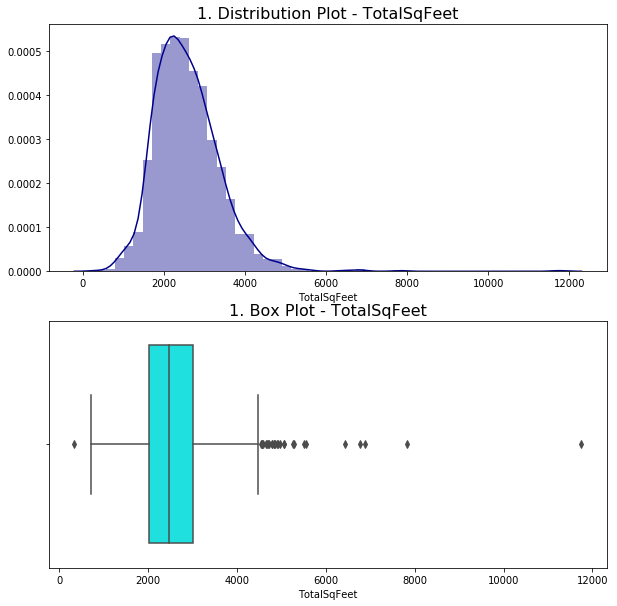

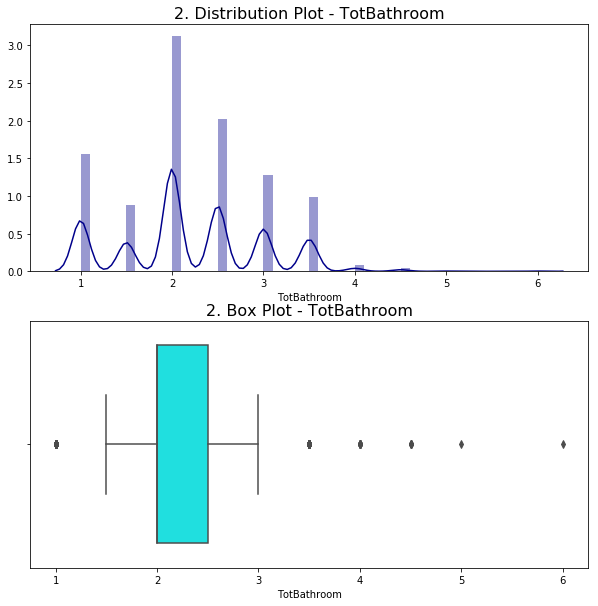

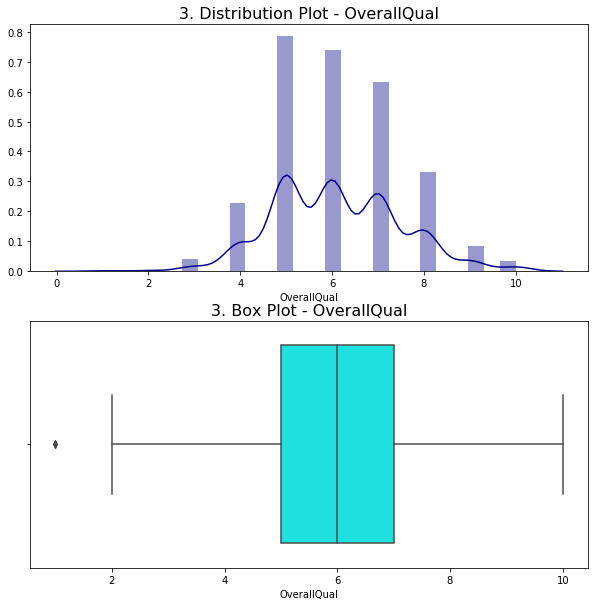

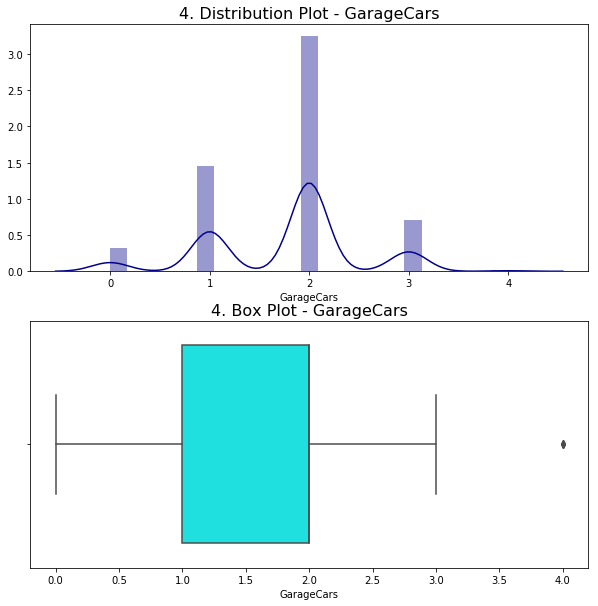

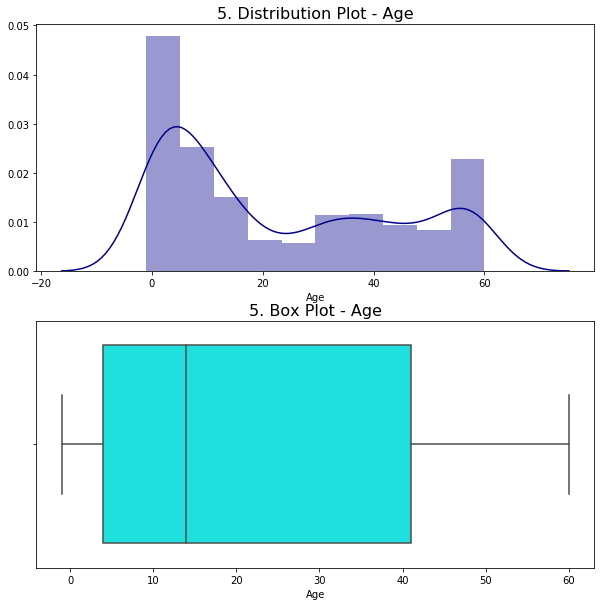

In [31]:
univariate_analysis(data, numerical)

# 7. Bivariate Analysis

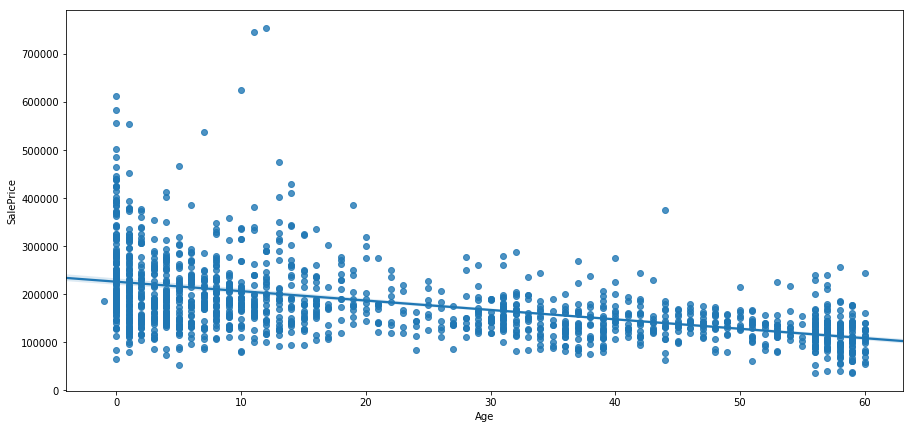

In [36]:
#create scatterplot for two variables, usually y is the target
plt.figure(figsize=(15,7))
sns.regplot(x = 'Age', y = 'SalePrice', data = data)

## Exercise

# Help = SHIFT+TAB

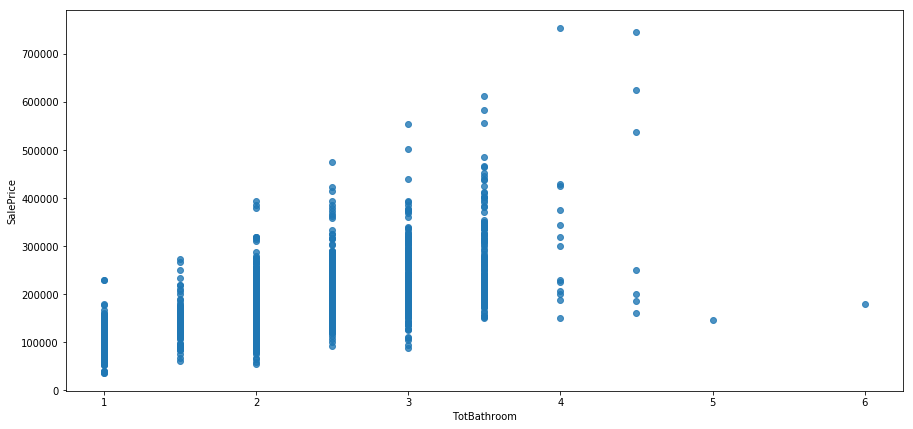

In [40]:
# Create scatterplot for TotBathroom and SalePrice
#please put your code here
plt.figure(figsize=(15,7))
sns.regplot(x = 'TotBathroom', y = 'SalePrice', data = data, fit_reg=False)


## Bivariate Analysis - one click to get all features

In [46]:
#create funtion to investigate the relationship of each feature to the label
def scatterplot(data, features, target):
    
    #loop though all features
    for index, feature in enumerate(features):
        
        plt.figure(figsize=(15,7))
        #create joint plot
        sns.regplot(x = feature, y = target, data = data, fit_reg=False)
        
        #show the figure
        plt.show()
        
         #store distribution plot and boxplot
        plt.savefig('exploration\\%d. Bivariate analysis of %s and %s.png' % (index+1, feature, target))

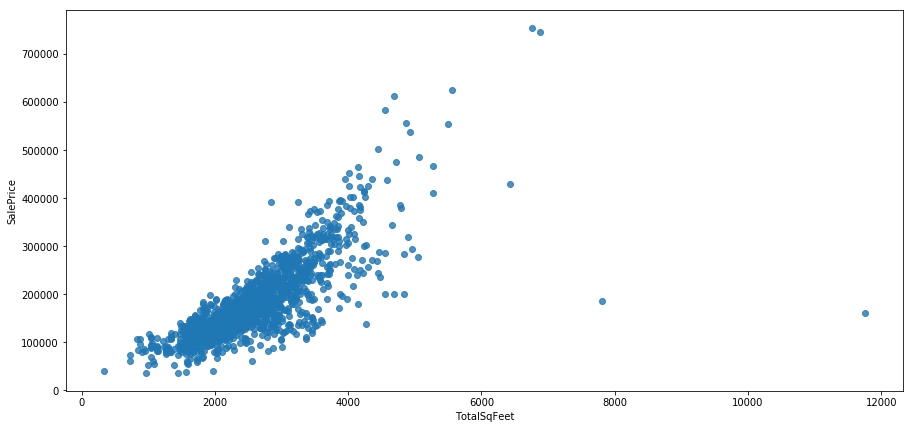

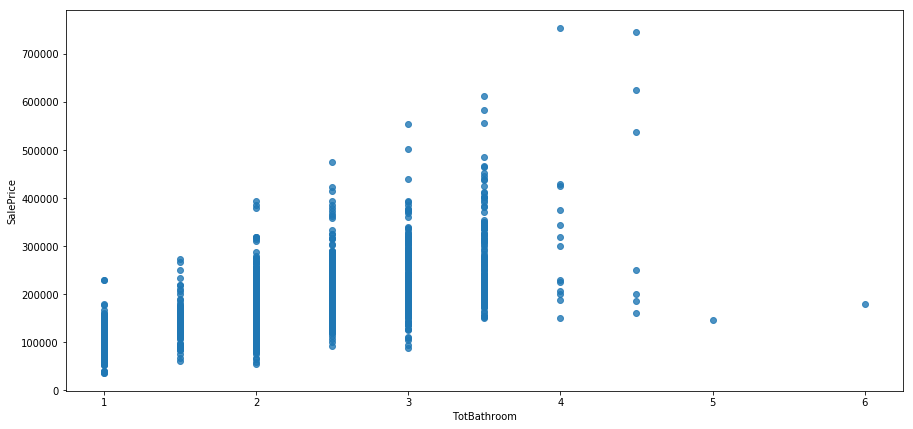

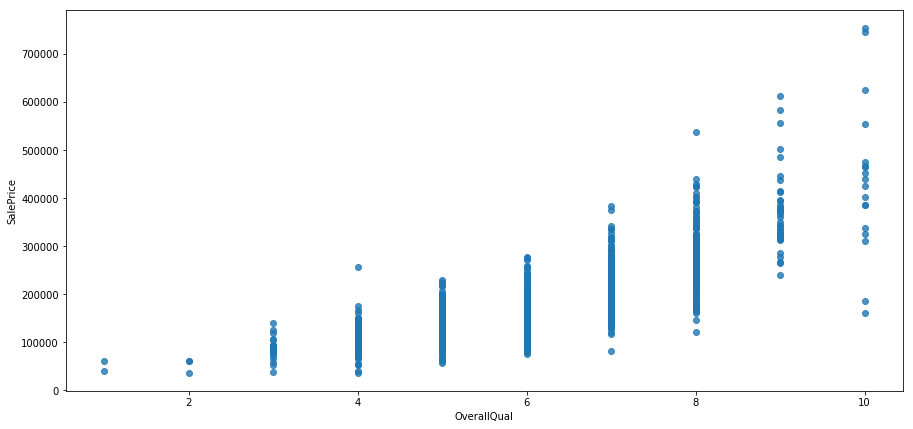

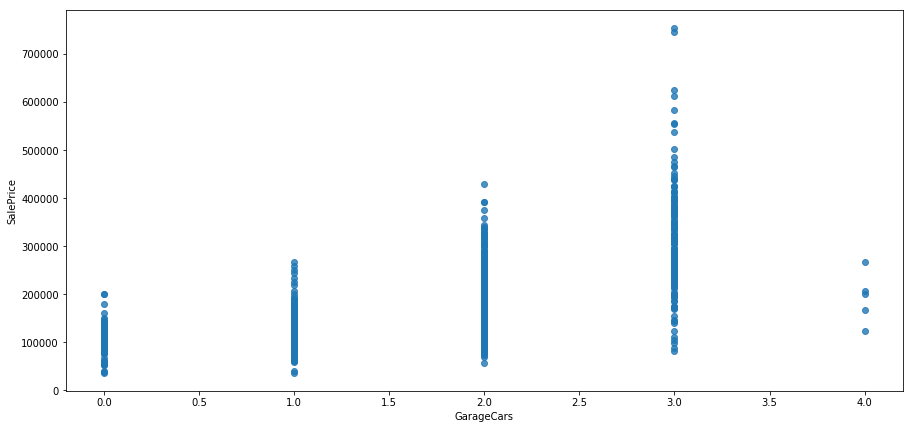

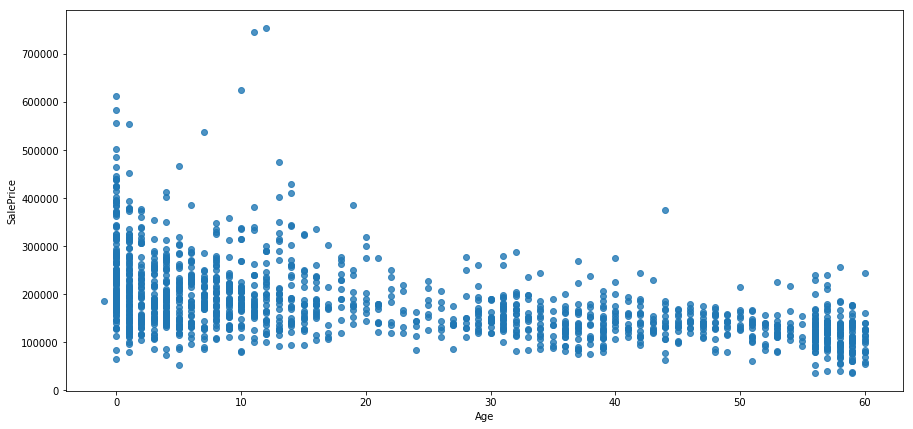

In [44]:
scatterplot(data, numerical, 'SalePrice')

# 8. Correlation

In [47]:
#correlation with pearson method
data.corr(method = 'pearson').style.background_gradient().set_precision(2)

,TotalSqFeet,TotBathroom,OverallQual,GarageCars,Age,SalePrice
TotalSqFeet,1,0.6,0.66,0.53,-0.34,0.78
TotBathroom,0.6,1,0.54,0.48,-0.44,0.63
OverallQual,0.66,0.54,1,0.6,-0.55,0.79
GarageCars,0.53,0.48,0.6,1,-0.42,0.64
Age,-0.34,-0.44,-0.55,-0.42,1,-0.51
SalePrice,0.78,0.63,0.79,0.64,-0.51,1


## Exercise

In [51]:
#correlation with spearman method
#put your code here
data.corr(method = 'spearman').style.background_gradient().set_precision(2)

,TotalSqFeet,TotBathroom,OverallQual,GarageCars,Age,SalePrice
TotalSqFeet,1,0.61,0.66,0.57,-0.36,0.81
TotBathroom,0.61,1,0.56,0.53,-0.42,0.7
OverallQual,0.66,0.56,1,0.61,-0.56,0.81
GarageCars,0.57,0.53,0.61,1,-0.46,0.69
Age,-0.36,-0.42,-0.56,-0.46,1,-0.58
SalePrice,0.81,0.7,0.81,0.69,-0.58,1


## Correlation with hitmap

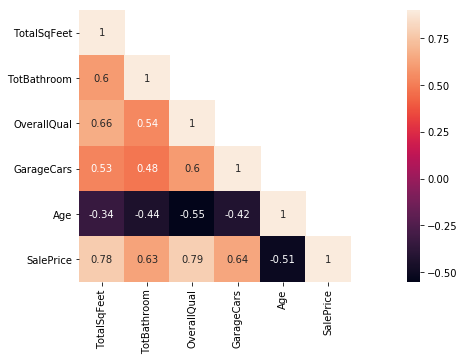

In [53]:
#create correlation with hitmap

#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,5)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)